<h1 style="font-size:36px;">Convolutional Neural Network(CNN)</h1>

CNN architecture includes several convolutional layers followed by several fully connected layers. A matrix of Bitcoin price data over the time range is used as input. Convolutional layers create feature maps by acting on the input matrix of the filters. Fully connected layers flatten the feature maps and render them into the output layer. When this architecture is used for Bitcoin price prediction, it allows to learn visual features of historical price data and use these features to predict future prices.

CNN mimarisi, birkaç evrişimli katman ve ardından birkaç tam bağlantılı katman içerir. Girdi olarak, zaman aralığındaki Bitcoin fiyat verilerinin bir matrisi kullanılır. Evrişimli katmanlar, filtrelerin girdi matrisi üzerinde hareket ederek özellik haritalarını oluşturur. Tam bağlantılı katmanlar, özellik haritalarını düzleştirir ve çıktı katmanına doğru işler. Bu mimari, Bitcoin fiyat tahmini için kullanıldığında, geçmiş fiyat verilerinin görsel özelliklerini öğrenmeyi ve bu özelliklerin gelecekteki fiyatları tahmin etmek için kullanılmasını sağlar.

<h1 style="font-size:15px;">Summary of the Model</h1>

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 60)            240       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 60)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1740)              0         
                                                                 
 dense (Dense)               (None, 60)                104460    
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 104,761
Trainable params: 104,761
Non-trainable params: 0
__________________________________________________

Model 1 uses a Conv1D layer with 58 input properties and then halves the size using a MaxPooling1D layer. It then creates an intermediate output using a Dense layer, and finally uses a Dense layer containing a single output neuron, the output layer. Model 1 has 104,761 trainable parameters.

Model 1, 58 adet girdi özelliğine sahip bir Conv1D katmanı kullanır ve ardından bir MaxPooling1D katmanı kullanarak boyutu yarıya indirir. Daha sonra, bir Yoğun katmanı kullanarak bir ara çıktı oluşturur ve son olarak, çıkış katmanı olan tek bir çıktı nöronu içeren bir Yoğun katman kullanır. Model 1, 104,761 eğitilebilir parametreye sahiptir.

<h1 style="font-size:15px;">Model Outputs</h1>

In [37]:
print(CNN1_ERROR)

        MSE      RMSE         MAE       R2
2031.524045 45.072431 1466.562713 0.977984



<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [2]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error
from keras.callbacks import History
import math
import yfinance as yf

In [3]:
btc = yf.Ticker("BTC-USD").history(period='max', interval='1d')
btc.reset_index(inplace=True)
close_btc = btc.Close.values
close_btc     

array([  457.33401489,   424.44000244,   394.79598999, ...,
       28091.56835938, 28680.53710938, 28947.95507812])

In [4]:

X = []
y = []
inp_num = 60

for i in range(inp_num, len(close_btc)):
    X.append(close_btc[i-inp_num:i])
    y.append(close_btc[i])

X = np.array(X)
y = np.array(y)

In [5]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = np.array(y[:split])
X_test = X[split:]
y_test = np.array(y[split:])

In [6]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential() 
model.add(Conv1D(filters=60, kernel_size=3, activation = "relu", input_shape=(inp_num, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 60)            240       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 60)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1740)              0         
                                                                 
 dense (Dense)               (None, 60)                104460    
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 104,761
Trainable params: 104,761
Non-trainable params: 0
__________________________________________________

In [9]:

hist = History() # Used to record loss per epoch
model.fit(X_train, y_train, epochs=200, batch_size = 32, callbacks=[hist])

Epoch 1/200
78/78 [==============================] - 0s 1ms/step - loss: 236595424.0000
Epoch 2/200
78/78 [==============================] - 0s 2ms/step - loss: 214688080.0000
Epoch 3/200
78/78 [==============================] - 0s 2ms/step - loss: 147883808.0000
Epoch 4/200
78/78 [==============================] - 0s 2ms/step - loss: 47056916.0000
Epoch 5/200
78/78 [==============================] - 0s 2ms/step - loss: 14040511.0000
Epoch 6/200
78/78 [==============================] - 0s 2ms/step - loss: 13199806.0000
Epoch 7/200
78/78 [==============================] - 0s 2ms/step - loss: 12640559.0000
Epoch 8/200
78/78 [==============================] - 0s 2ms/step - loss: 12190583.0000
Epoch 9/200
78/78 [==============================] - 0s 2ms/step - loss: 11767645.0000
Epoch 10/200
78/78 [==============================] - 0s 2ms/step - loss: 11423626.0000
Epoch 11/200
78/78 [==============================] - 0s 2ms/step - loss: 11001936.0000
Epoch 12/200
78/78 [==================

78/78 [==============================] - 0s 2ms/step - loss: 2168059.0000
Epoch 96/200
78/78 [==============================] - 0s 2ms/step - loss: 2216324.7500
Epoch 97/200
78/78 [==============================] - 0s 2ms/step - loss: 2174148.2500
Epoch 98/200
78/78 [==============================] - 0s 2ms/step - loss: 2165479.2500
Epoch 99/200
78/78 [==============================] - 0s 2ms/step - loss: 2171852.0000
Epoch 100/200
78/78 [==============================] - 0s 2ms/step - loss: 2129304.5000
Epoch 101/200
78/78 [==============================] - 0s 2ms/step - loss: 2134242.5000
Epoch 102/200
78/78 [==============================] - 0s 2ms/step - loss: 2103147.5000
Epoch 103/200
78/78 [==============================] - 0s 2ms/step - loss: 2092645.1250
Epoch 104/200
78/78 [==============================] - 0s 2ms/step - loss: 2081471.6250
Epoch 105/200
78/78 [==============================] - 0s 2ms/step - loss: 2060082.5000
Epoch 106/200
78/78 [=============================

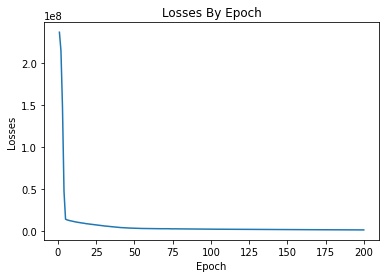

In [30]:
losses = hist.history['loss']
plt.plot(np.arange(1, len(losses) + 1),losses)
plt.title("Losses By Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()

In [31]:

yhat = model.predict(X_test)
yhat = yhat.reshape(yhat.shape[0],)

20/20 [==============================] - 0s 989us/step


In [32]:

mse = math.sqrt(mean_squared_error(y_test, yhat))
print("RMSE = " + str(mse))

RMSE = 2031.524045219791


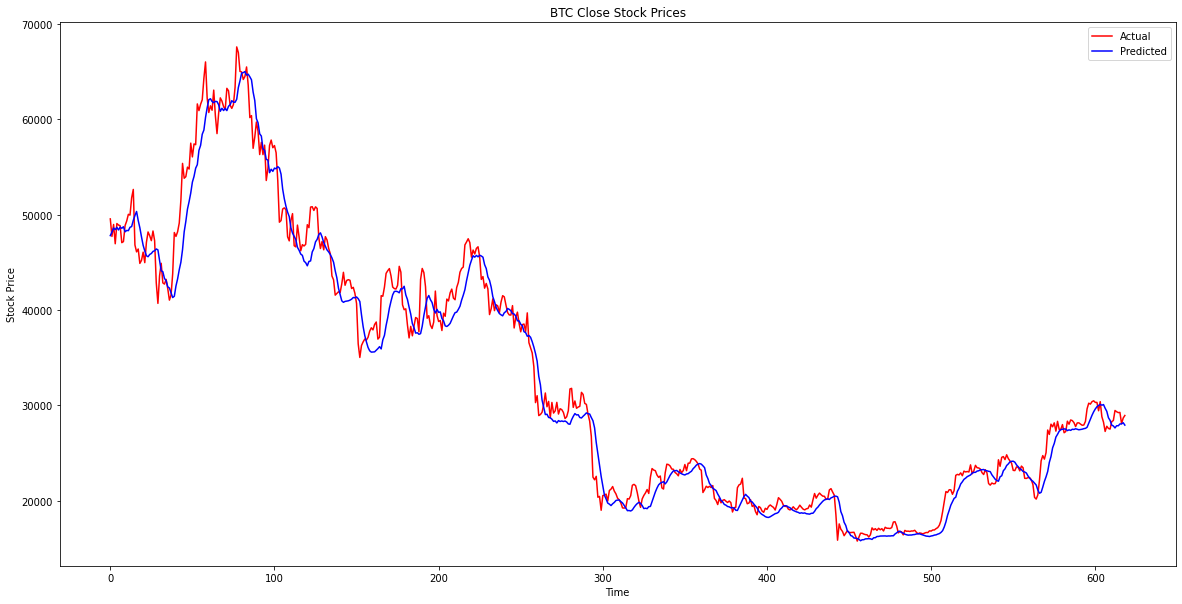

In [39]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="red", label="Actual")
plt.plot(yhat, color = "blue", label = "Predicted")
plt.title("BTC Close Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [38]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MSE = math.sqrt(mean_squared_error(y_test, yhat))
RMSE =np.sqrt(mse)
print(mse)
print(rmse)

2031.524045219791
45.07243109950684


In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MAE = mean_absolute_error(y_test, yhat)
print('MAE:', mae)
R2 = r2_score(y_test, yhat)
print('R2:', r2)

MAE: 1466.5627129821285
R2: 0.9779835750131977


In [36]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN1_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNN1_ERROR = CNN1_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNN1_ERROR)

        MSE      RMSE         MAE       R2
2031.524045 45.072431 1466.562713 0.977984
